In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

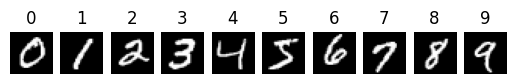

In [3]:
# Loop through each digit (0-9)
for digit in range(10):
    # Find the first occurrence of each digit in the training dataset
    index = np.where(y_train == digit)[0][0]

    # Display the image for this digit
    plt.subplot(1, 10, digit + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f'{digit}')
    plt.axis('off')  # Hide axis for a cleaner view

# Show the plot with all digits
plt.show()

In [4]:
# Normalize the image data to values between 0 and 1
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [5]:
# One-hot encoding for labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [6]:
# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [8]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8591 - loss: 0.4456 - val_accuracy: 0.9627 - val_loss: 0.1120
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9671 - loss: 0.1084 - val_accuracy: 0.9735 - val_loss: 0.0876
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9776 - loss: 0.0722 - val_accuracy: 0.9724 - val_loss: 0.0921
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9821 - loss: 0.0575 - val_accuracy: 0.9778 - val_loss: 0.0762
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9848 - loss: 0.0458 - val_accuracy: 0.9800 - val_loss: 0.0669
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9875 - loss: 0.0390 - val_accuracy: 0.9788 - val_loss: 0.0729
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9885 - loss: 0.0369 - val_accuracy: 0.9817 - val_loss: 0.0735
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9910 - loss: 0.0279 - val

In [9]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07435020804405212
Test accuracy: 0.9847000241279602


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


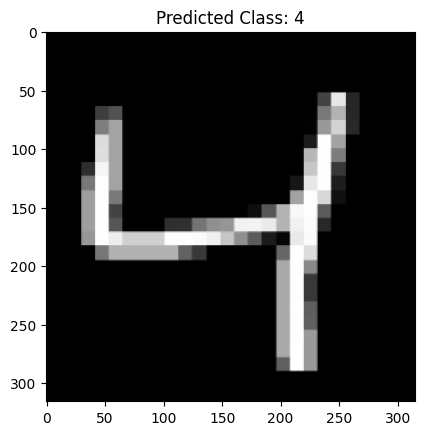

Predicted Class: 4


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

# Load the trained model (replace with your actual model)
# model = load_model('your_trained_model.h5')

# Load and preprocess the PNG image
def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert to grayscale (if not already in grayscale)
    img = img.convert('L')

    # Resize the image to 28x28 (for MNIST, adjust based on your dataset)
    img = img.resize((28, 28))

    # Convert to a numpy array and normalize the pixel values to [0, 1]
    img_array = np.array(img) / 255.0

    # Reshape the image to match the input shape (1, 784) for MNIST
    img_array = img_array.reshape(1, 784)

    return img_array

# Path to the PNG image
image_path = 'four.png'  # Update this with your actual image path

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict the class using the trained model
prediction = model.predict(processed_image)

# Get the predicted class (index of the highest probability)
predicted_class = np.argmax(prediction)

# Display the image
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

print(f"Predicted Class: {predicted_class}")
